In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Giriş hissəsi

In [2]:
df=pd.read_csv('Students Social Media Addiction.csv',sep=';')
df

,Student_ID,Age,Gender,Academic_Level,Country,AVG_Daily_Usage,Most_Used_Platform,Affects_Academic_Performance,Sleep_hours,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,"2,5",Instagram,Yes,"5,6",6,In Relationship,3,8
1,2,22,Male,Graduate,India,"1,2",Twitter,No,"5,7",8,Single,0,3
2,6,19,Female,Undergraduate,Australia,"2,7",Instagram,Yes,"5,4",4,Complicated,5,9
3,11,19,Male,Undergraduate,France,"8,4",Snapchat,Yes,"2,6",5,Complicated,3,7
4,12,20,Female,Undergraduate,Spain,"5,5",TikTok,Yes,"8,5",6,In Relationship,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,701,20,Female,Undergraduate,Italy,"7,4",TikTok,No,"2,7",7,In Relationship,2,5
592,702,23,Male,Graduate,Russia,"8,6",Instagram,Yes,"9,5",4,Single,5,9
593,703,21,Female,Undergraduate,China,"6,5",WeChat,Yes,"7,6",6,In Relationship,3,7
594,704,24,Male,Graduate,Japan,"3,4",Twitter,No,"5,7",8,Single,2,4


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Student_ID                    596 non-null    int64 
 1   Age                           596 non-null    int64 
 2   Gender                        596 non-null    object
 3   Academic_Level                596 non-null    object
 4   Country                       596 non-null    object
 5   AVG_Daily_Usage               596 non-null    object
 6   Most_Used_Platform            596 non-null    object
 7   Affects_Academic_Performance  596 non-null    object
 8   Sleep_hours                   596 non-null    object
 9   Mental_Health_Score           596 non-null    int64 
 10  Relationship_Status           596 non-null    object
 11  Conflicts_Over_Social_Media   596 non-null    int64 
 12  Addicted_Score                596 non-null    int64 
dtypes: int64(5), object(

In [4]:
df.shape

(596, 13)

In [5]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
AVG_Daily_Usage                 0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_hours                     0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['AVG_Daily_Usage']=df['AVG_Daily_Usage'].str.replace(',','.').astype(float)
df['Sleep_hours']=df['Sleep_hours'].str.replace(',','.').astype(float)

In [9]:
df.describe()

,Student_ID,Age,AVG_Daily_Usage,Sleep_hours,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,596.000000,596.00000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,357.820470,20.66443,5.632215,5.577685,6.243289,2.845638,6.421141
std,206.531255,1.41474,2.479971,2.493040,1.089077,0.938261,1.562853
min,1.000000,18.00000,1.200000,1.400000,4.000000,0.000000,3.000000
25%,175.750000,19.00000,3.500000,3.600000,5.000000,2.000000,5.000000
50%,360.000000,21.00000,5.500000,5.600000,6.000000,3.000000,7.000000
75%,541.250000,22.00000,7.500000,7.600000,7.000000,4.000000,8.000000
max,705.000000,24.00000,9.700000,9.800000,8.000000,5.000000,9.000000


In [10]:
df[['Age','AVG_Daily_Usage','Sleep_hours','Mental_Health_Score','Conflicts_Over_Social_Media','Addicted_Score']].describe()

,Age,AVG_Daily_Usage,Sleep_hours,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,596.00000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,20.66443,5.632215,5.577685,6.243289,2.845638,6.421141
std,1.41474,2.479971,2.493040,1.089077,0.938261,1.562853
min,18.00000,1.200000,1.400000,4.000000,0.000000,3.000000
25%,19.00000,3.500000,3.600000,5.000000,2.000000,5.000000
50%,21.00000,5.500000,5.600000,6.000000,3.000000,7.000000
75%,22.00000,7.500000,7.600000,7.000000,4.000000,8.000000
max,24.00000,9.700000,9.800000,8.000000,5.000000,9.000000


In [11]:
for col in['Gender','Academic_Level','Country','Most_Used_Platform','Affects_Academic_Performance','Relationship_Status']:
    print(df[col].value_counts())

Gender
Female    298
Male      298
Name: count, dtype: int64
Academic_Level
Undergraduate    300
Graduate         272
High School       24
Name: count, dtype: int64
Country
India         41
USA           31
Canada        27
France        25
Denmark       24
              ..
San Marino     1
Bhutan         1
Iraq           1
Yemen          1
Syria          1
Name: count, Length: 101, dtype: int64
Most_Used_Platform
Instagram    213
TikTok       128
Facebook     104
WhatsApp      42
Twitter       30
LinkedIn      16
WeChat        13
Snapchat      12
VKontakte     11
LINE          10
KakaoTalk      9
YouTube        8
Name: count, dtype: int64
Affects_Academic_Performance
Yes    379
No     217
Name: count, dtype: int64
Relationship_Status
Single             327
In Relationship    242
Complicated         27
Name: count, dtype: int64


In [12]:
df.groupby('Gender')['Addicted_Score'].mean()

Gender
Female    6.456376
Male      6.385906
Name: Addicted_Score, dtype: float64

In [13]:
df.groupby('Country')['AVG_Daily_Usage'].mean().sort_values(ascending=False)

Country
Armenia           9.5
Thailand          9.5
Austria           9.4
Jamaica           9.4
Qatar             9.4
                 ... 
Slovakia          3.2
Lithuania         2.3
Greece            2.3
Czech Republic    1.6
Israel            1.3
Name: AVG_Daily_Usage, Length: 101, dtype: float64

## Təsviri Statistika

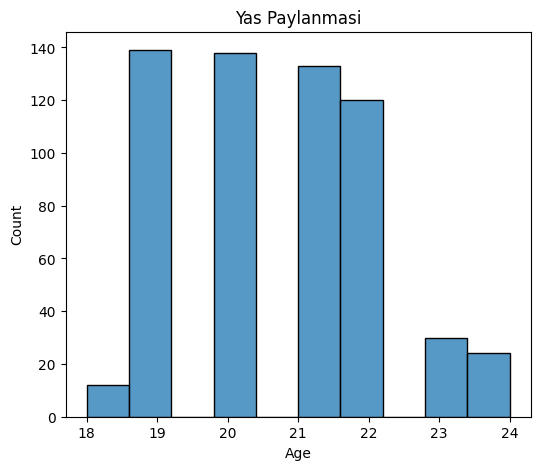

In [14]:
plt.figure(figsize=(6,5))
sns.histplot(df['Age'],bins=10)
plt.title('Yas Paylanmasi')
plt.show()

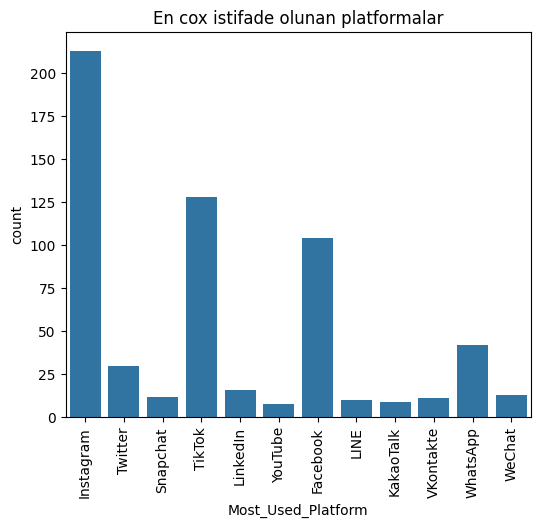

In [15]:
plt.figure(figsize=(6,5))
sns.countplot(x='Most_Used_Platform',data=df)
plt.title('En cox istifade olunan platformalar')
plt.xticks(rotation=90)
plt.show()

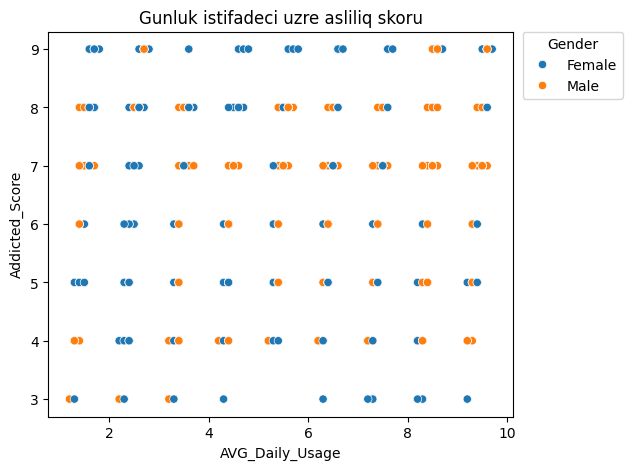

In [16]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df,x='AVG_Daily_Usage',y='Addicted_Score',hue='Gender')
plt.title('Gunluk istifadeci uzre asliliq skoru')
plt.legend(title="Gender",
          bbox_to_anchor=(1.02, 1),
          loc='upper left',
          borderaxespad=0)
plt.show()

## Korrelyasiya Matrissi

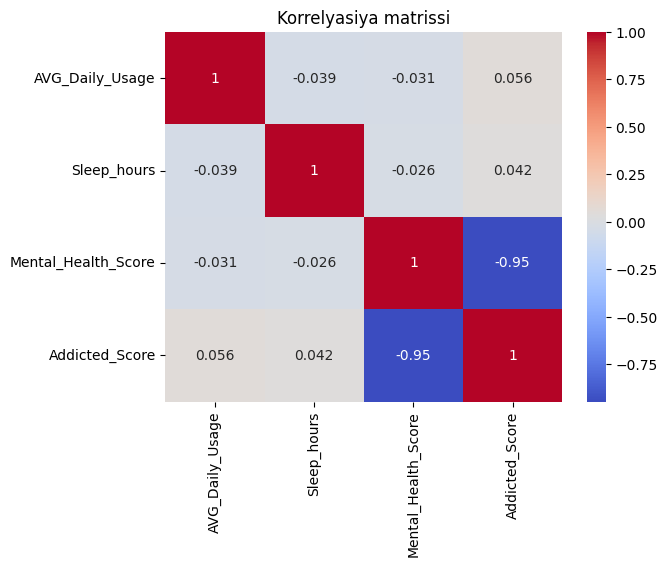

In [17]:
corr=df[['','Sleep_hours','Mental_Health_Score','Addicted_Score']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Korrelyasiya matrissi')
plt.show()

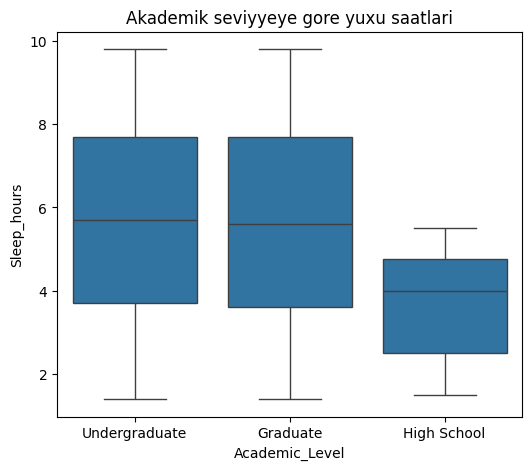

In [18]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Academic_Level',y='Sleep_hours',data=df)
plt.title('Akademik seviyyeye gore yuxu saatlari')
plt.savefig('boxplot.png')
plt.show()

In [19]:
df.corr(numeric_only=True)

,Student_ID,Age,AVG_Daily_Usage,Sleep_hours,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,1.000000,0.246912,-0.060502,-0.070609,-0.015930,0.122277,0.000859
Age,0.246912,1.000000,-0.045774,-0.021283,0.151249,-0.183429,-0.160974
AVG_Daily_Usage,-0.060502,-0.045774,1.000000,-0.039077,-0.030784,0.001418,0.055684
Sleep_hours,-0.070609,-0.021283,-0.039077,1.000000,-0.025790,0.020655,0.041842
Mental_Health_Score,-0.015930,0.151249,-0.030784,-0.025790,1.000000,-0.895761,-0.946022
Conflicts_Over_Social_Media,0.122277,-0.183429,0.001418,0.020655,-0.895761,1.000000,0.936112
Addicted_Score,0.000859,-0.160974,0.055684,0.041842,-0.946022,0.936112,1.000000


In [20]:
df[df['Academic_Level']=='Undergraduate']['Sleep_hours']

0      5.6
2      5.4
3      2.6
4      8.5
7      8.6
      ... 
587    2.6
589    6.6
591    2.7
593    7.6
595    3.6
Name: Sleep_hours, Length: 300, dtype: float64

In [21]:
df[df['Academic_Level']=='Graduate']['Sleep_hours']

1      5.7
5      2.7
11     3.7
14     9.6
18     4.7
      ... 
586    7.6
588    1.7
590    3.6
592    9.5
594    5.7
Name: Sleep_hours, Length: 272, dtype: float64

In [22]:
df[df['Academic_Level']=='High School']['Sleep_hours']

6     5.5
10    5.5
15    2.5
19    3.5
22    4.5
27    1.5
31    4.5
34    3.5
39    2.5
43    5.5
46    2.5
51    2.5
55    4.5
58    5.5
64    4.5
66    2.5
70    3.5
72    5.5
74    2.5
77    4.5
80    3.5
84    2.5
87    4.5
90    5.5
Name: Sleep_hours, dtype: float64

In [23]:
from scipy import stats
male=df[df['Gender']=='Male']['Addicted_Score']
female=df[df['Gender']=='Female']['Addicted_Score']
t_stat,p_val=stats.ttest_ind(male,female)
print(f'T-stat:{t_stat},P-deyer:{p_val}')

T-stat:-0.5500767513865192,P-deyer:0.5824735071597444


In [24]:
male.mean(), female.mean()

(np.float64(6.385906040268456), np.float64(6.456375838926174))

In [25]:
print('----Olkelere ve platformalara gore orta mental saglamliq skoru----')
df.groupby(['Country','Most_Used_Platform']).agg({'Mental_Health_Score':'mean'})


----Olkelere ve platformalara gore orta mental saglamliq skoru----


,,Mental_Health_Score
Country,Most_Used_Platform,
Albania,TikTok,6.0
Andorra,TikTok,5.0
Argentina,TikTok,5.0
Armenia,Instagram,5.0
Australia,Facebook,7.0
...,...,...
Uruguay,YouTube,7.0
Uzbekistan,TikTok,5.0
Venezuela,Facebook,7.0


### Günlük Sosial Mediya İstifadesi ile Yuxu Saatı Arasında Əlaqə

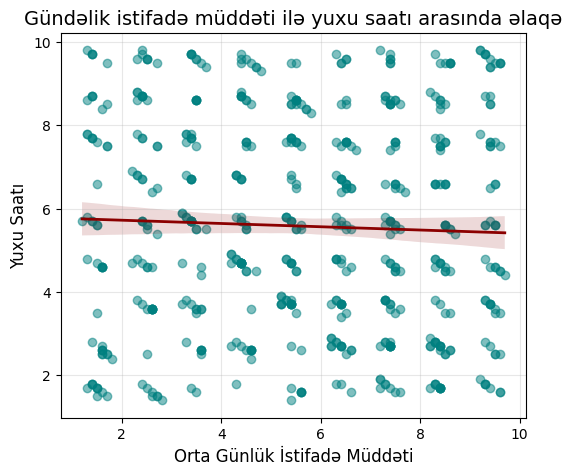

In [34]:
plt.figure(figsize=(6,5))
sns.regplot(
    data=df,
    x='AVG_Daily_Usage',
    y='Sleep_hours',
    scatter_kws={'alpha':0.5,'color':'teal'},
    line_kws={'color':'darkred','lw':2})
plt.title('Gündəlik istifadə müddəti ilə yuxu saatı arasında əlaqə',fontsize=14)
plt.xlabel('Orta Günlük İstifadə Müddəti',fontsize=12)
plt.ylabel('Yuxu Saatı',fontsize=12)
plt.grid(True,alpha=0.3)
plt.show()

### Ən Çox İstifadə Olunan Platformalar və Onların Orta Aslılıq Səviyyəsi

In [36]:
order=df.groupby('Most_Used_Platform')['Addicted_Score'].mean().sort_values(ascending=False).index

C:\Users\User\AppData\Local\Temp\ipykernel_14532\3707325875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Most_Used_Platform',y='Addicted_Score',order=order,errorbar='sd',palette='viridis')


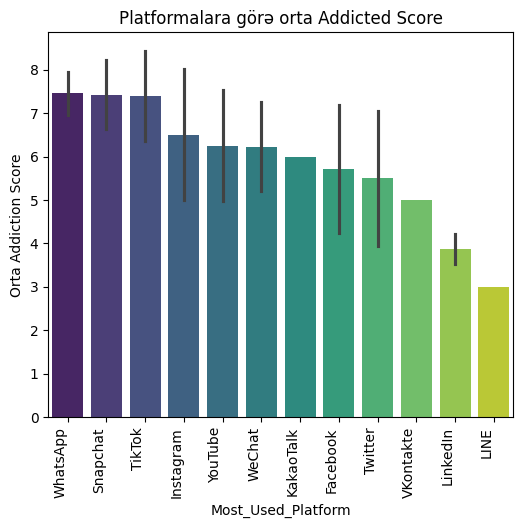

In [37]:
plt.figure(figsize=(6,5))
sns.barplot(data=df,x='Most_Used_Platform',y='Addicted_Score',order=order,errorbar='sd',palette='viridis')
plt.title('Platformalara görə orta Addicted Score')
plt.xticks(rotation=90,ha='right')
plt.ylabel('Orta Addiction Score')
plt.show()

### Yaş Qrupuna Görə Orta Mental Sağlamlıq

In [42]:
df['Age_Group']=pd.cut(df['Age'],bins=[17,20,23,26,30],labels=['18-20','21-23','24-26','27+'])

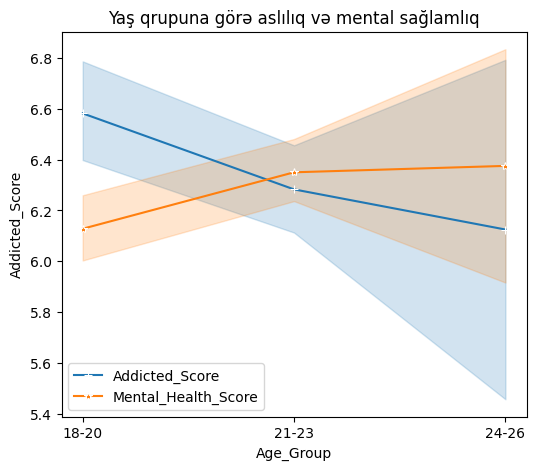

In [45]:
plt.figure(figsize=(6,5))
sns.lineplot(data=df,x='Age_Group',y='Addicted_Score',marker='+',label='Addicted_Score')
sns.lineplot(data=df,x='Age_Group',y='Mental_Health_Score',marker='*',label='Mental_Health_Score')
plt.title('Yaş qrupuna görə aslılıq və mental sağlamlıq')  
plt.legend()
plt.savefig('lineplot.png')
plt.show()


In [51]:
from scipy.stats import f_oneway
f1, p1=f_oneway(
    df[df['Age_Group']=='18-20']['Addicted_Score'],
    df[df['Age_Group']=='21-23']['Addicted_Score'],
    df[df['Age_Group']=='24-26']['Addicted_Score'])

f2,p2=f_oneway(
    df[df['Age_Group']=='18-20']['Mental_Health_Score'],
    df[df['Age_Group']=='21-23']['Mental_Health_Score'],
    df[df['Age_Group']=='24-26']['Mental_Health_Score'])
print('Addiction Score:',p1)
print('Mentan Health Score:',p2)

Addiction Score: 0.0466667219470823
Mentan Health Score: 0.042674013686410245


### Akademik Performansa Təsir Göstərən Amillərin Xüsusiyyətləri

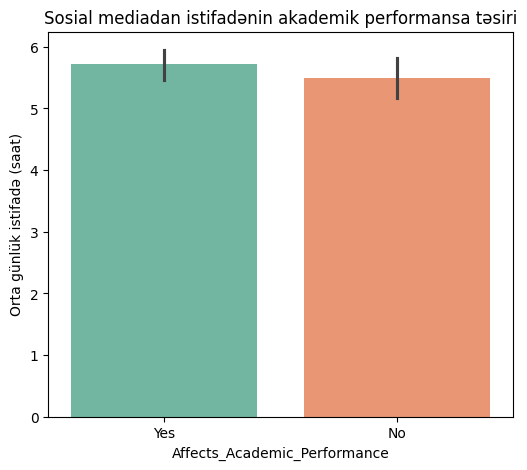

In [54]:
plt.figure(figsize=(6,5))
sns.barplot(data=df,x='Affects_Academic_Performance',y='AVG_Daily_Usage',hue='Affects_Academic_Performance',palette='Set2')
plt.title('Sosial mediadan istifadənin akademik performansa təsiri')
plt.ylabel('Orta günlük istifadə (saat)')
plt.show()


### Yüksək aslılıq qrupu 

In [56]:
high_add=df[df['Addicted_Score']>=7]

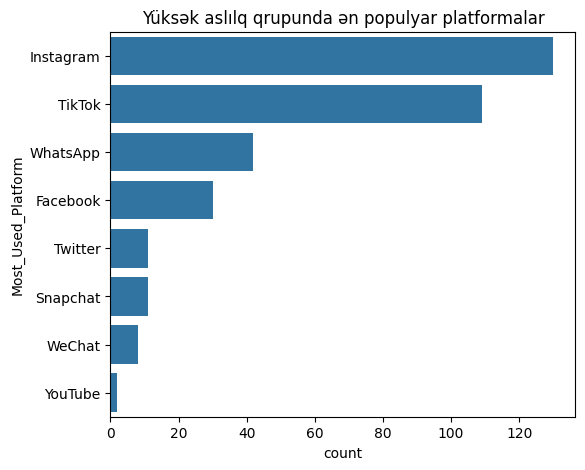

In [62]:
plt.figure(figsize=(6,5))
sns.countplot(data=high_add,y='Most_Used_Platform',order=high_add['Most_Used_Platform'].value_counts().index)
plt.title('Yüksək aslılq qrupunda ən populyar platformalar')
plt.show()

### Əlaqə Statusuna Görə Orta Aslılıq Səviyyəsi

C:\Users\User\AppData\Local\Temp\ipykernel_14532\2341352298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Relationship_Status',y='Addicted_Score',palette='pastel')


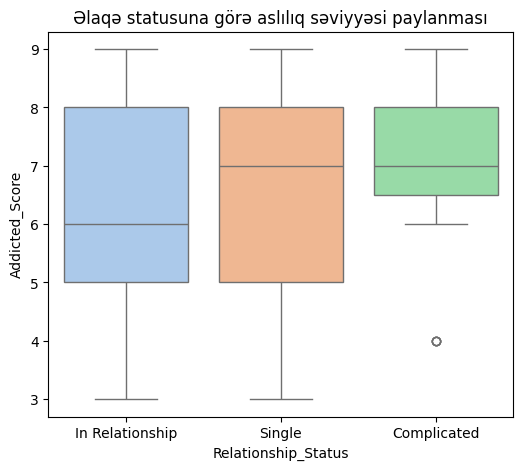

In [65]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df,x='Relationship_Status',y='Addicted_Score',palette='pastel')
plt.title('Əlaqə statusuna görə aslılıq səviyyəsi paylanması')
plt.savefig('boxplot.png')
plt.show()

In [72]:
from scipy.stats import f_oneway
f, p=f_oneway(
     df[df['Relationship_Status']=='In Relationship']['Addicted_Score'],
     df[df['Relationship_Status']=='Single']['Addicted_Score'],
     df[df['Relationship_Status']=='Complicated']['Addicted_Score'])
print(p)

0.044584731122135075


## Əsas Analiz Sualları və Cavablar